In [1]:
#如何读取数据集 这里用Fashion-MNIST数据集， MNIST过于简单
import torch
import torchvision #pytorch对于计算机视觉一些模型实现的库
from torch.utils import data
from torchvision import transforms #transforms是对数据操作的模块
from d2l import torch as d2l

d2l.use_svg_display() #用svg显示图片清晰度高 我理解是svg格式

In [2]:
#通过框架的内置函数将Fasion-MNIST数据集下载并读取到内存中
#通过ToTensor实例将图像数据从PIL类型变换为 32位浮点数格式
#并除以255 使得所有像素的值都在0-1之间
#PIL 是 Python 的图像库，PIL 的图像数据类型
trans = transforms.ToTensor() #首先将图片转为pytorch的tensor
# 路径 /下载的是训练数据集 / 得到的是trans定义的格式的数据 / 默认网上下载（也可以事先下好放data文件夹里）
mnist_train = torchvision.datasets.FashionMNIST(root ="./data",train = True,transform = trans, download=True)
# 测试数据集
mnist_test = torchvision.datasets.FashionMNIST(root ="./data",train = False,transform = trans, download=True)

len(mnist_train), len(mnist_test)
# 训练集60000张，测试集10000张图

(60000, 10000)

In [3]:
mnist_train[0][0].shape # [0][0]表示第0个sample的第0张图片
#torch.Size([1, 28, 28])  channel为1（黑白图片）， 长宽为28

torch.Size([1, 28, 28])

In [14]:
# 可视化数据集的函数
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    " plot a list images"
    figsize = (num_cols * scale, num_rows * scale)
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = d2l.plt.subplots(num_rows, num_cols,figsize=figsize)
    figs = figs.flatten()
    # zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表
    # 将figs坐标框， imgs输入的图片， labels 打包成一个个
    #元素((figs1,imgs1，titles1),(figs2,imgs2，titles2),...)
    for f, img, lbl in zip(figs, imgs, titles):
        if torch.is_tensor(img):
            #图片张量
            f.imshow(img.numpy())
        else:
            #PIL图片
            f.imshow(img)
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

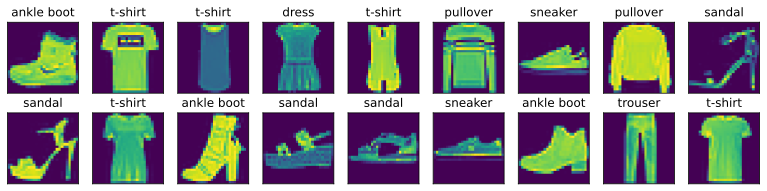

In [15]:
X,y = next(iter(data.DataLoader(mnist_train, batch_size=18))) #训练数据集的第一个小批量
show_images(X.reshape(18,28,28), 2, 9, titles=get_fashion_mnist_labels(y))
# reshape(18,28,28), 是舍弃了channel,搞成18张28*28的图片
# 显示成2行 每行9张

In [17]:
#读取 一小批量数据 大小为batch_size
batch_size = 256
def get_dataloader_workers():
    "使用4个进程来读取的数据, 根据cpu来定"
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, 
                             num_workers=get_dataloader_workers())

timer = d2l.Timer() #测试运行速度
for X,y in train_iter:
    continue
print(f'{timer.stop():2f} sec')

3.294763 sec


In [ ]:
#最后将所有上面的函数整合成一个函数
def load_data_fashion_mnist(batch_size, resize=None):
    "下载Fashion-MNIST数据集，然后将其加载到内存"
    trans = [transform.ToTensor()] #将 PIL 图像或 numpy.ndarray 转换为 Tensor，并归一化到 [0, 1] 之间
    if resize:
        trans.insert(0,transforms.Resize(resize))  #如果图片需要扩大那就resize
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root ="./data",train = True,transform = trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root ="./data",train = False,transform = trans, download=True)
    return (data.DataLoader(mnist_train,batch_size, shuffle=True,
                              num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test,batch_size, shuffle=True,
                              num_workers=get_dataloader_workers())